In [2]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, Wedge, FancyArrow, FancyBboxPatch, Rectangle, Circle
from matplotlib.lines import Line2D
from matplotlib.font_manager import FontManager

import pandas as pd
import numpy as np

In [41]:
def create_promoter(ax, start, base, color='#000', text='promoter',
                    height=1, width=0.8, margin=0.25, lw=2, text_offset=1.2, z=-2):
    
    prom_dim = (height, width) #height, width
    arrow_dim = (0.5 * height, 0.5 * width)
    prom_len = (2 * margin) + (prom_dim[1] + arrow_dim[1]) # how many times longer than the width

    prom_start = start #plasmid_pos[0] + roundness
    prom_end = prom_start + prom_len
    prom_pos = prom_start + margin

    ax.add_line(Line2D([prom_pos, prom_pos], [base, base +prom_dim[0]], lw=lw, color=color, zorder=z))
    ax.add_line(Line2D([prom_pos, prom_pos+prom_dim[1]], [base+prom_dim[0], base+prom_dim[0]], lw=lw, color=color, zorder=z))
    ax.add_patch(Polygon([(prom_pos+prom_dim[1], base+prom_dim[0]-arrow_dim[0]/2),
                          (prom_pos+prom_dim[1]+arrow_dim[1], base+prom_dim[0]),
                          (prom_pos+prom_dim[1], base+prom_dim[0]+arrow_dim[0]/2)], color=color, zorder=z))
    ax.add_line(Line2D([prom_start, prom_end], [base, base], lw=lw, color='#000', zorder=-1))

    ax.text(prom_pos+((prom_dim[1]+arrow_dim[1])/2), base-text_offset, text, fontsize=12, horizontalalignment='center')
    
    return prom_end
    
def create_rbs(ax, start, base, color='#666', text='rbs',
               radius=0.5, margin=0.25, lw=2, text_offset=1):
    
    rbs_size = radius
    rbs_len = (2 * margin) + (2 * rbs_size)  # how many times longer than the radius

    rbs_start = start #prom_end
    rbs_end = rbs_start + rbs_len
    rbs_pos = rbs_start + margin + rbs_size

    ax.add_patch(Wedge((rbs_pos, base), rbs_size, 0, 180, lw=lw, color='gray', zorder=-2))
    ax.add_line(Line2D([rbs_start, rbs_end], [base, base], lw=lw, color='black', zorder=-1))
    
    ax.text(rbs_pos, base-text_offset, text, fontsize=12, horizontalalignment='center')
    
    return rbs_end

def create_cds(ax, start, base, color='#ff0000', text='cds',
               length=2, width=1, margin=0.25, lw=2, text_offset=1.5):
    
    cds_dim = (length, width) #length, width
    head_dim = (width, 1.6 * width) #length, width
    cds_len = (2 * margin) + (cds_dim[0] + head_dim[0]) #how many times longer than the width

    cds_start = start #rbs_end
    cds_end = cds_start + cds_len
    cds_pos = cds_start + margin
    ax.add_patch(FancyArrow(cds_pos, base, cds_dim[0], 0, width=cds_dim[1],
                            head_length=head_dim[0], head_width=head_dim[1], lw=lw,
                            edgecolor='#000', facecolor=color))
    ax.add_line(Line2D([cds_start, cds_end], [base, base], lw=lw, color='black', zorder=-1))
    
    ax.text(cds_pos+((cds_dim[1]+head_dim[1])/2), base-text_offset, text, fontsize=12, horizontalalignment='center')
    
    return cds_end

def create_terminator(ax, start, base, color='#000', text='terminator',
                      height=1, width=0.8, margin=0.25, lw=2, text_offset=1):
    
    term_dim = (height, width) #height, width
    term_len = (2*margin) + term_dim[1] #how many times longer than the width

    term_start = start #cds_end
    term_end = term_start + term_len
    term_pos = term_start + margin + (term_dim[1]/2)

    ax.add_line(Line2D([term_pos, term_pos], [base, base+term_dim[0]], lw=lw, color='black'))
    ax.add_line(Line2D([term_pos-term_dim[1]/2, term_pos+term_dim[1]/2],
                       [base+term_dim[0], base+term_dim[0]], lw=lw, color='black'))
    ax.add_line(Line2D([term_start, term_end], [base, base], lw=lw, color='black', zorder=-1))
    
    ax.text(term_pos, base-text_offset, text, fontsize=12, horizontalalignment='center')
    
    return term_end
    
def create_tu(ax, prom_start, base, cols=['#000', '#666', '#ff0000', '#000'], texts=['', '', '', ''], margin=0.25, lw=2):
    
    prom_end = create_promoter(ax, start=prom_start, base=base, color=cols[0], text=texts[0], margin=margin, lw=lw)
    rbs_end = create_rbs(ax, start=prom_end, base=base, color=cols[1], text=texts[1], margin=margin, lw=lw)
    cds_end = create_cds(ax, start=rbs_end, base=base, color=cols[2], text=texts[2], margin=margin, lw=lw)
    term_end = create_terminator(ax, start=cds_end, base=base, color=cols[3], text=texts[3], margin=margin, lw=lw)
    return term_end

def create_plasmid(ax, height, width, roundness=0.6, color='#fff', text='pBR322', lw=2, text_offset=1.5):
    
    plasmid_dim = (height, width)
    plasmid = FancyBboxPatch((roundness, roundness),
                           plasmid_dim[1]-2*roundness, plasmid_dim[0]-2*roundness,
                           boxstyle="round, pad={}".format(roundness), fill=None, lw=lw, zorder=-1)
    ax.add_patch(plasmid)
    ax.add_patch(Circle((plasmid_dim[1]/2, 0), 1.5, edgecolor='black', facecolor='white', lw=lw))
    ax.text(width/2, 0, text, fontsize=12, horizontalalignment='center')

In [4]:
parts = pd.read_csv('datasets/jump/sbol-parts.csv')
parts['level_0'] = parts['name'] + '_' + parts['overhang']
parts#.head()

,name,overhang,sequence,color,level_0
0,P11,P,GCCTCCACACCGCTCGTCACATCCTGTGATCCATTCCCCGCCCATC...,#f26520,P11_P
1,E11-N,NOC,atgagcgatagtccgcagaaactgggtcgtaatgaatggaatgcat...,#f26520,E11-N_NOC
2,E11-C,NOC,acagatgtaacgattaaaagaataatatccaaaggagaacttgaat...,#f26520,E11-C_NOC
3,P20,P,GCGCGGATAAAAATTTCATTTGCCCGCGACGGTTTTTCCGCCCATC...,#e23322,P20_P
4,E20-N,NOC,aatgaaaccgatcctgatctggaactgctgaaacgtattggtaata...,#e23322,E20-N_NOC
5,E20-C,NOC,ctgaaaaaaatcctgaaaatcgaggaactggatgaacgcgaactga...,#e23322,E20-C_NOC
6,P38,P,CAGTACAAAATTTTTTAGATGCGTTGTACAACCCTCACGGGGGTGG...,#81171b,P38_P
7,E38-N,NOC,CCTGCCGCACGTCCGGCACGTATTACCAATCAGCGTGATGGTGCAG...,#81171b,E38-N_NOC
8,E38-C,NOC,tgtgaaatctttgaaaacgagatcgactgggatgaaattgccagca...,#81171b,E38-C_NOC
9,P42,P,CAGTACAAAATTTTTTAGATGCGTTCGCTGTCGATCCGGCCCGTCG...,#ca4642,P42_P


In [5]:
color_dict = {a: b for a, b in zip(parts['level_0'], parts['color'])}

In [6]:
plan = pd.read_csv('datasets/jump/sbol-plan.csv')
plan

,id,name,part1,part2,part3,part4,vector
0,1,PBAD-34-E11-N_A,PBAD_P,B0034_R,E11-N_NOC,B0015_T,1A
1,2,PCin-34-E11-C_B,PCin_P,B0034_R,E11-C_NOC,B0015_T,1B
2,3,PSalTTC-34-E20-N_C,PSalTTC_P,B0034_R,E20-N_NOC,B0015_T,1C
3,4,PLuxB-34-E20-C_D,PLuxB_P,B0034_R,E20-C_NOC,B0015_T,1D
4,5,PBAD-34-E38-N_A,PBAD_P,B0034_R,E38-N_NOC,B0015_T,1A
5,6,PCin-34-E38-C_B,PCin_P,B0034_R,E38-C_NOC,B0015_T,1B
6,7,PSalTTC-34-E42-N_C,PSalTTC_P,B0034_R,E42-N_NOC,B0015_T,1C
7,8,PLuxB-34-E42-C_D,PLuxB_P,B0034_R,E42-C_NOC,B0015_T,1D
8,9,PBAD-PCin-PSalTTC-PCin-E11-E20_A,PBAD-34-E11-N_A,PCin-34-E11-C_B,PSalTTC-34-E20-N_C,PLuxB-34-E20-C_D,2A
9,10,PBAD-PCin-PSalTTC-PCin-E38-E42_B,PBAD-34-E38-N_A,PCin-34-E38-C_B,PSalTTC-34-E42-N_C,PLuxB-34-E42-C_D,2B


In [7]:
plan_idx = {a: b for a, b in zip(plan['name'], plan.index)}

In [8]:
def disassemble_parts(row):
    
    output = []
    for i in row.iloc[2:-1].tolist():
        if i not in plan_idx:
            output.append(i)
        else:
            output.append(disassemble_parts(plan.iloc[plan_idx[i]]))
    return output
    
constructs = []
for _, row in plan.iterrows():
    parts = np.array(disassemble_parts(row)).flatten().tolist()
    colors = [color_dict[i] if i in color_dict else '#000000' for i in parts]
    constructs.append((row['name'], parts, colors))

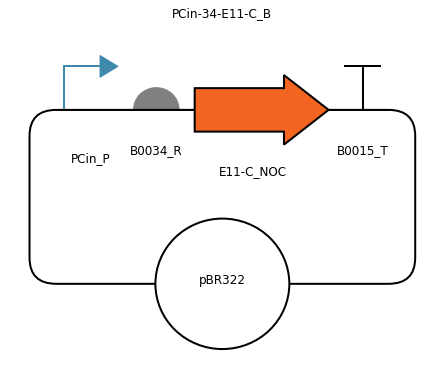

In [42]:
def generate_figure(sample, show_plasmid=True, margin=0.18, plasmid_height=4, roundness=0.6, 
                   w_offset=1, h_offset=4, lw=2):

    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    # transcriptional unit
    point = roundness
    num_part = 4
    for i in range(0, len(sample[1]), num_part):
        point = create_tu(ax, point, plasmid_height, sample[2][i:i+num_part], sample[1][i:i+num_part], margin=margin, lw=lw)
    
    # plasmid
    if show_plasmid:
        
        plasmid_width = roundness + point
        create_plasmid(ax, plasmid_height, plasmid_width, roundness, lw=lw)
        width = plasmid_width + w_offset
        height = plasmid_height + h_offset
    
    fig.set_figwidth(width/5*4)
    fig.set_figheight(height/5*4)
    ax.set_xlim(-(w_offset/2), width-(w_offset/2))
    ax.set_ylim(-(h_offset/2), height-(h_offset/2))
    
    plt.axis('off')
    plt.title(sample[0])
    #plt.savefig('datasets/jump/001.png', dpi=300)
    plt.show()

sample = constructs[1]
generate_figure(sample)

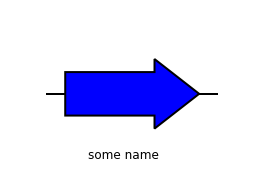

In [50]:
def generate_figure(sample, margin=0.4, w_offset=1, h_offset=4, lw=2):

    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    # transcriptional unit
    point = create_cds(ax, margin, 0, margin=margin, text='some name', color='blue')
    width = margin + point + w_offset
    height = h_offset
    
    fig.set_figwidth(width/5*4)
    fig.set_figheight(height/5*4)
    ax.set_xlim(-(w_offset/2), width-(w_offset/2))
    ax.set_ylim(-(h_offset/2), height-(h_offset/2))
    
    plt.axis('off')
    #plt.savefig('datasets/jump/001.png', dpi=300)
    plt.show()

sample = constructs[1]
generate_figure(sample)